In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image  #cv2 and PIL.Image are for image processing.
import tensorflow as tf #tensorflow and keras are used to build and train the neural network
tf.random.set_seed(3) #sets the seed for random number generation to ensure consistent results.
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets
-

In [6]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()
#sets the seed for random number generation to ensure consistent results.

In [9]:
type(X_train)

numpy.ndarray

In [11]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
Training data = 60,000 Images
Test data = 10,000 Images

Image dimension  --> 28 x 28
Grayscale Image  --> 1 channel

In [13]:
print(X_train[10])

#displays the raw pixel values of the 11th training image, which helps verify the structure and content of the data before feeding it into the model

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [15]:
print(X_train[10].shape)

(28, 28)


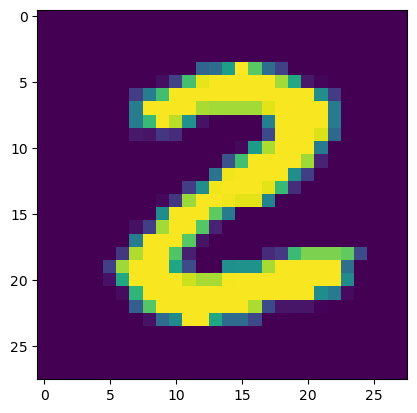

2


In [17]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

visual understanding of what a typical MNIST image looks like.

*Image* Lables 
-

In [22]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [24]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


This code checks and prints the unique values in `Y_train` and `Y_test` to confirm that the labels cover all possible digit classes (0-9), ensuring that the model is trained on a complete set of digit classes.

We can use these labels as such or we can also apply One Hot Encoding
All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension
but,there is no step in this code where one-hot encoding is applied. The model uses sparse_categorical_crossentropy as the loss function, which allows it to work directly with integer labels (0-9) rather than requiring one-hot encoded vectors.

In [ ]:
# scaling the values

X_train = X_train/255
X_test = X_test/255
#normalizes the pixel values of X_train and X_test to the 0-1 range, which helps the model learn more efficiently and improves training stability.

In [33]:
# 11th image in X_train after normalization. This allows you to visually confirm that the pixel values have been scaled to the range of 0 to 1, validating the normalization step.
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network
-

In [38]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), #Converts each 28x28 image into a 784-element 1D array.
                          keras.layers.Dense(50, activation='relu'), #Two hidden Dense layers with 50 neurons each use the ReLU activation function for non-linear transformations.
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid') #The output Dense layer has 10 neurons (one for each digit) with a sigmoid activation function, producing probability scores.
])

# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

#This line configures the model with the `Adam` optimizer for efficient training, `sparse_categorical_crossentropy` as the loss function for classification for handling integer-labeled classes, and `accuracy` as a metric to evaluate model performance during training and testing.

training the Neural Network
-

In [41]:
model.fit(X_train, Y_train, epochs=10)
#Trains the model using the training dataset for 10 epochs, printing accuracy and loss at each epoch

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8461 - loss: 0.5256
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9518 - loss: 0.1571
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9649 - loss: 0.1151
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9727 - loss: 0.0900
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9783 - loss: 0.0724
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9823 - loss: 0.0603
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9846 - loss: 0.0516
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9863 - loss: 0.0442
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9890 - loss: 0.0373
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9900 - loss: 0.0324


Training data accuracy = 98.9%

**Accuracy on Test data:**
-

In [45]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)
#Evaluates the model's performance on the test dataset and prints the accuracy.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9583 - loss: 0.1533
0.9656000137329102


Test data accuracy = 97.1%

In [50]:
print(X_test.shape)

(10000, 28, 28)


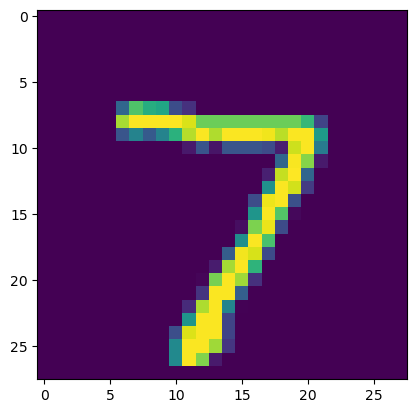

In [52]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [54]:
print(Y_test[0])

7


In [58]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)


In [60]:
print(Y_pred[0])

[1.5640639e-02 4.2768522e-07 2.1511975e-01 9.8625767e-01 5.0514355e-08
 5.4332884e-03 3.4207151e-10 9.9999708e-01 1.0439628e-02 2.8779426e-01]


model.predict() gives the prediction probability of each class for that data point

In [63]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [65]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 3, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 8, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

**Confusin Matrix**
-

In [71]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [73]:
print(conf_mat)

tf.Tensor(
[[ 960    0    1    1    1    1    2    0    3   11]
 [   0 1115    2    4    0    0    5    1    7    1]
 [   2    0  995   18    1    0    4    5    6    1]
 [   0    0    2  998    0    2    0    1    2    5]
 [   0    0    4    1  940    0    6    2    2   27]
 [   3    0    0   59    1  799   11    1   14    4]
 [   5    2    1    0    4    2  942    0    2    0]
 [   1    3   10   11    2    0    0  980    3   18]
 [   4    0    6   13    1    0    3    3  939    5]
 [   2    2    1    9    8    2    1    5    9  970]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

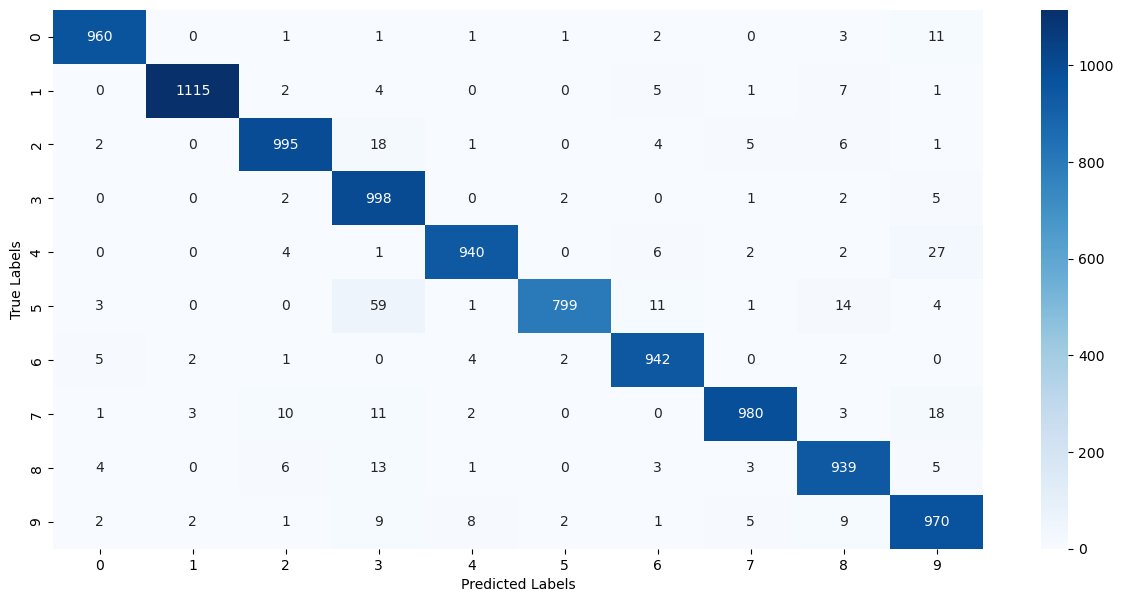

In [75]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [119]:
input_image_path = r'C:\Users\Acer\Desktop\STUDY\PYTHON\Digit classification\download.png'
input_image = cv2.imread(input_image_path)

In [121]:
type(input_image)

numpy.ndarray

In [123]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


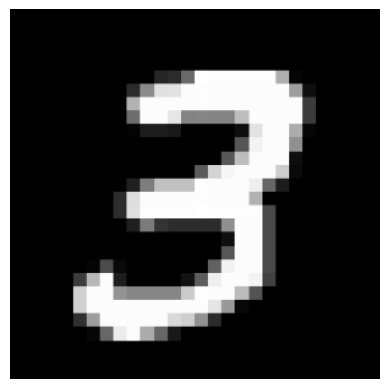

In [129]:
import cv2
import matplotlib.pyplot as plt

# Load the image
input_image_path = r'C:\Users\Acer\Desktop\STUDY\PYTHON\Digit classification\download.png'
input_image = cv2.imread(input_image_path)

# Check if the image was loaded correctly
if input_image is None:
    print("Error: Image not loaded. Please check the path.")
else:
    # Display the image using Matplotlib
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for proper display
    plt.axis('off')  # Turn off the axis labels
    plt.show()


In [163]:
input_image.shape

(318, 318, 3)

In [165]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [167]:
grayscale.shape

(318, 318)

In [169]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [171]:
input_image_resize.shape

(28, 28)

In [173]:
input_image_resize = input_image_resize/255

In [175]:
type(input_image_resize)

numpy.ndarray

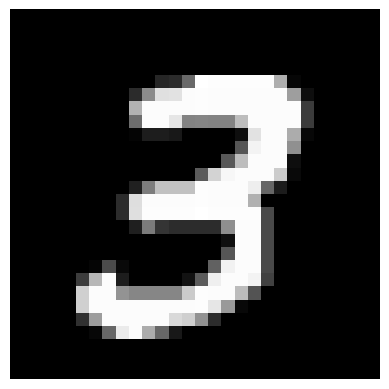

In [181]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming `input_image_resize` is your resized image

# Convert the image to uint8 if necessary
if input_image_resize.dtype != np.uint8:
    input_image_resize = (255 * input_image_resize).astype(np.uint8)

# Check if the image is loaded/resized correctly
if input_image_resize is None:
    print("Error: Resized image not available.")
else:
    # Display the image using Matplotlib
    plt.imshow(cv2.cvtColor(input_image_resize, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    plt.axis('off')  # Turn off axis labels
    plt.show()


In [183]:
input_image_resize = input_image_resize/255

In [185]:
type(input_image_resize)

numpy.ndarray

In [187]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [189]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[7.4127692e-12 1.7652384e-04 3.2475029e-04 1.0000000e+00 2.7361421e-17
  8.4734273e-01 7.1945165e-17 4.9634305e-06 1.2733373e-02 9.5202762e-01]]


In [191]:
input_pred_label = np.argmax(input_prediction)

In [193]:
print(input_pred_label)

3


**Predictive System**
-

Path of the image to be predicted:  C:\\Users\\Acer\\Desktop\\STUDY\\PYTHON\\Digit classification\\download.png


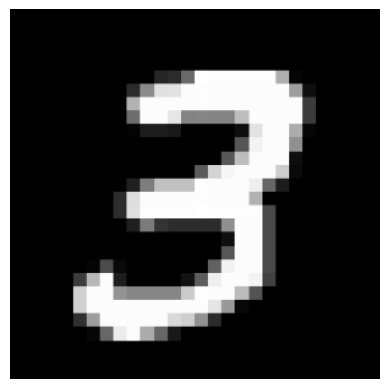

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The Handwritten Digit is recognised as: 3


In [208]:
# Get the image path
input_image_path = input('Path of the image to be predicted: ')
# Read the image
input_image = cv2.imread(input_image_path)
# Check if the image was loaded correctly
if input_image is None:
    print("Error: Image not found. Please check the path.")
else:
    # Display the image using Matplotlib
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    plt.axis('off')  # Turn off axis labels
    plt.show()
    # Convert the image to grayscale
    grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    # Resize the grayscale image to 28x28
    input_image_resize = cv2.resize(grayscale, (28, 28))
    # Normalize the pixel values
    input_image_resize = input_image_resize / 255.0
    # Reshape the image to the format expected by the model (batch size, height, width)
    image_reshaped = np.reshape(input_image_resize, (1, 28, 28))
    # Make a prediction using the model
    input_prediction = model.predict(image_reshaped)
    # Get the predicted label (digit)
    input_pred_label = np.argmax(input_prediction)
    # Print the predicted label
    print('The Handwritten Digit is recognised as:', input_pred_label)